In [1]:
## Importing the Req. Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
## For giving the features name 

headers = ["Wifi1", "Wifi2", "Wifi3", "Wifi4", "Wifi5", "Wifi6", "Wifi7", "Room" ]
df = pd.read_table("wifi_localization.txt",header=None,names=headers)

In [3]:
## Checking the Top 5 rows

df.head()

,Wifi1,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


<AxesSubplot:ylabel='Room'>

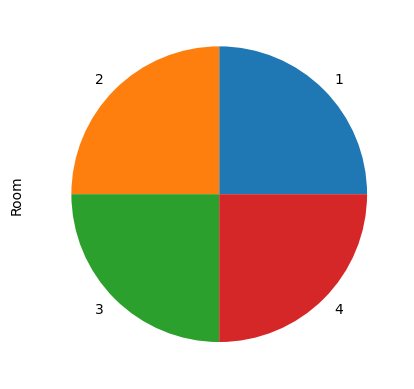

In [4]:
## Checking the balance of the dataset on y.
## Bcz if the dataset is imbalanced then there is a high chances of overfitting.

df["Room"].value_counts().plot(kind="pie")

In [5]:
## Checking the null values

df.isnull().sum()


Wifi1    0
Wifi2    0
Wifi3    0
Wifi4    0
Wifi5    0
Wifi6    0
Wifi7    0
Room     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi1   2000 non-null   int64
 1   Wifi2   2000 non-null   int64
 2   Wifi3   2000 non-null   int64
 3   Wifi4   2000 non-null   int64
 4   Wifi5   2000 non-null   int64
 5   Wifi6   2000 non-null   int64
 6   Wifi7   2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df['Room'].value_counts()

1    500
2    500
3    500
4    500
Name: Room, dtype: int64

<AxesSubplot:>

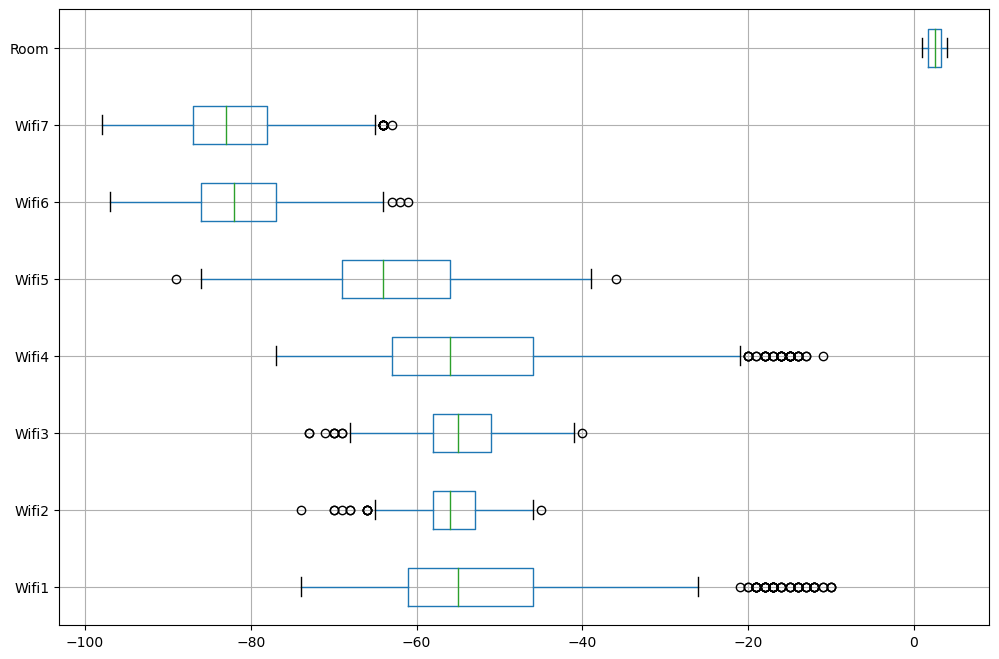

In [8]:
## Box plot for Outliers and For FIVE Number Summary
## Five Number summary includes (Min. Value , Max Value , Median , Q1 , Q3)

plt.figure(figsize = (12,8))
df.boxplot(vert = 0)

In [9]:
## Function of IQR 
def odiqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    m = df.mean()
    df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
    return df

In [10]:
## Function of MSD 
def odmsd(df):
    m = round(df.mean(),2)
    s = round(df.std(),2)
    low = round(m-(3*s),2)
    high = round(m+(3*s),2)
    ft1 = df[df<low]
    ft2 = df[df>high]
    df = df.map(lambda x : low if x < low else (high if x > high else x ))

In [11]:
clist = df.columns[0:7:1]

In [12]:
clist

Index(['Wifi1', 'Wifi2', 'Wifi3', 'Wifi4', 'Wifi5', 'Wifi6', 'Wifi7'], dtype='object')

<AxesSubplot:>

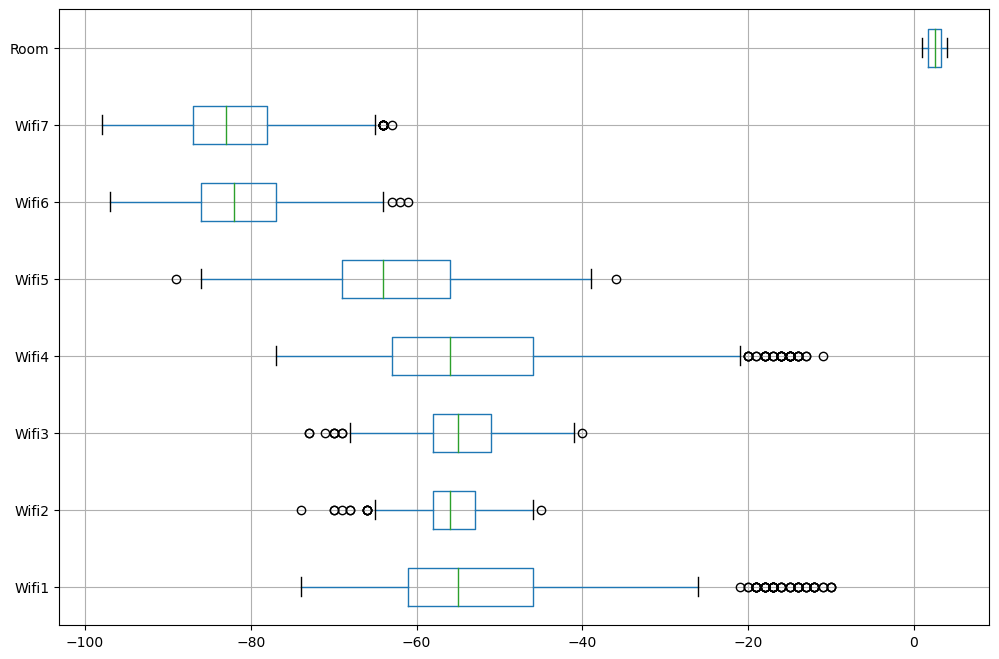

In [13]:
## Before Applying the OD

plt.figure(figsize = (12,8))
df.boxplot(vert = 0)

In [44]:
## Applying the OD Technique baased on Skeness
## Below 0.5 is Symmetric and the OD's are ( Zscore & MSD)
## Above 0.5 is ASymmetric and the OD's are ( IQR & Percentile)

for i in clist:
    if df[i].skew() >= 0.5:
        df[i] = odiqr(df[i])
    else:
        odmsd(df[i])

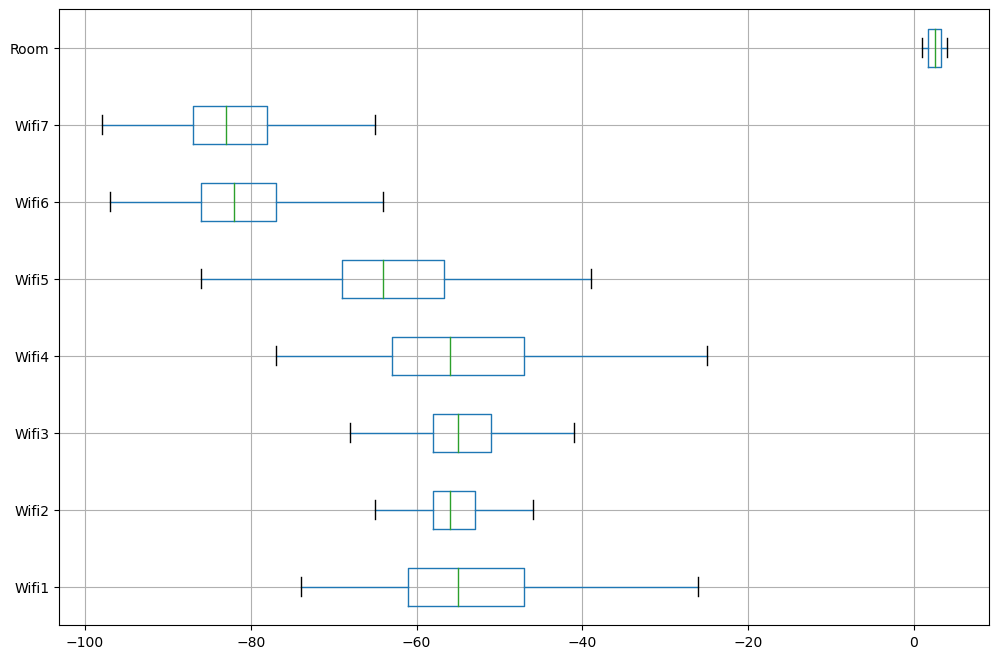

In [45]:
## After Applying the OD
plt.figure(figsize = (12,8))
df.boxplot(vert = 0)
plt.show()

In [16]:
## Taking the Dependent Variable in(X)
## Taking the InDependent Variable in(y)

X = df.drop('Room',axis = 1)
y = df['Room']

In [17]:
X

,Wifi1,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7
0,-64.0,-56,-61,-66.0,-71,-82,-81.0
1,-68.0,-57,-61,-65.0,-71,-85,-85.0
2,-63.0,-60,-60,-67.0,-76,-85,-84.0
3,-61.0,-60,-68,-62.0,-77,-90,-80.0
4,-63.0,-65,-60,-63.0,-77,-81,-87.0
...,...,...,...,...,...,...,...
1995,-59.0,-59,-48,-66.0,-50,-86,-94.0
1996,-59.0,-56,-50,-62.0,-47,-87,-90.0
1997,-62.0,-59,-46,-65.0,-45,-87,-88.0
1998,-62.0,-58,-52,-61.0,-41,-90,-85.0


In [18]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    4
1996    4
1997    4
1998    4
1999    4
Name: Room, Length: 2000, dtype: int64

In [19]:
## Splitting the Dataset into Training & testing 
## Splitting in 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [20]:
X_train.shape , X_test.shape ,X.shape

((1600, 7), (400, 7), (2000, 7))

In [21]:
y_train.shape , y_test.shape ,y.shape

((1600,), (400,), (2000,))

In [22]:
X_train.head()

,Wifi1,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7
0,-64.0,-56,-61,-66.0,-71,-82,-81.0
816,-38.0,-57,-50,-38.0,-60,-74,-69.0
790,-36.0,-57,-52,-40.0,-66,-75,-75.0
361,-67.0,-61,-63,-65.0,-71,-81,-87.0
592,-38.0,-63,-61,-43.0,-64,-76,-76.0


In [23]:
X_test

,Wifi1,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7
674,-39.0,-56,-53,-49.0,-70,-80,-75.0
1699,-62.0,-58,-49,-64.0,-42,-86,-89.0
1282,-53.0,-53,-50,-55.0,-59,-86,-81.0
1315,-47.0,-57,-57,-52.0,-62,-86,-84.0
1210,-49.0,-59,-57,-50.0,-72,-80,-91.0
...,...,...,...,...,...,...,...
400,-60.0,-54,-56,-64.0,-70,-78,-80.0
763,-39.0,-51,-57,-36.0,-64,-65,-71.0
385,-66.0,-57,-59,-64.0,-69,-82,-84.0
1667,-64.0,-57,-53,-61.0,-50,-86,-98.0


In [24]:
y_train

0       1
816     2
790     2
361     1
592     2
       ..
1791    4
1096    3
1932    4
235     1
1061    3
Name: Room, Length: 1600, dtype: int64

In [25]:
y_test

674     2
1699    4
1282    3
1315    3
1210    3
       ..
400     1
763     2
385     1
1667    4
1820    4
Name: Room, Length: 400, dtype: int64

## Model Building :
1. Model object creation
2. Model fitting
3. Model prediction
4. Model Evaluation

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.score(X_test,y_test)

0.7790913236924786

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([ 2.2628962 ,  4.3650856 ,  3.16738203,  2.92579937,  2.1623332 ,
        3.4668961 ,  1.65484025,  0.53246514,  2.54581557,  2.12054518,
        3.1909548 ,  2.80450646,  3.88314072,  2.63070401,  1.48089983,
        3.85249725,  2.03803391,  2.82280616,  1.44118085,  2.79730392,
        1.47340753,  3.32359878,  4.3340013 ,  2.69023485,  1.82866797,
        1.55252199,  3.24915606,  1.6689704 ,  2.51930417,  1.58323804,
        3.79023909,  2.25185651,  3.98493147,  2.34589311,  2.54778453,
        2.43370021,  2.58678602,  1.24568412,  1.51939138,  3.65042428,
        1.60245326,  1.46753941,  2.88920879,  2.50025434,  2.88844954,
        3.50001653,  1.89257835,  3.66767603,  3.49611428,  4.84071668,
        4.00448577,  2.67300611,  2.91444571,  1.97551725,  2.66396101,
        2.60226144,  1.19909161,  2.70224715,  4.18168223,  2.30472253,
        2.30275734,  1.31781698,  2.87845176,  3.27895523,  3.22937624,
        1.51549802,  2.93897497,  1.18991704,  2.98157188,  3.10

In [31]:
y_test

674     2
1699    4
1282    3
1315    3
1210    3
       ..
400     1
763     2
385     1
1667    4
1820    4
Name: Room, Length: 400, dtype: int64

In [32]:
""" A statistical measure of fit that indicates 
    how much variation of a dependent variable is explained by the 
    independent variable(s) in a regression model""".


r2_score(y_test,y_pred) #coefficient of determination (1-RSS/TSS)

0.7790913236924786

In [33]:
"""measures how close a regression line is to a set of data points"""

mean_squared_error(y_test,y_pred) #MSE = (1/n) * Σ(actual – forecast)2

0.2736934238319768

## Assumptions
1. Linear Relationship - Linear Regression needs linear relationship b/w independent variable(x) and dependent variable(y).
2. Normality : Linear Regression requires all the variables to be normally distributed. The error term also should be normally distributed. There should be no outliers in the data because linear regression is very sensitive to outliers.
3. Multi-collinearity - There should be very little or no multi-collinearity in the data. Multi-collinearity happens when the independent variables are too highly correlated with each other. There are different methods to measure multi-collinearity . They are as follows :

## After Doing Standardization

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
ss = StandardScaler()

In [58]:
ss.fit(X_train)

StandardScaler()

In [59]:
Xtrain_ss = ss.transform(X_train)

In [60]:
Xtest_ss = ss.transform(X_test)

In [61]:
model1 = LinearRegression()

In [62]:
model1.fit(Xtrain_ss,y_train)

LinearRegression()

In [63]:
model1.score(Xtest_ss,y_test)

0.7790913236924785

In [64]:
y_pred_ss = model1.predict(Xtest_ss)

In [65]:
y_pred_ss

array([ 2.2628962 ,  4.3650856 ,  3.16738203,  2.92579937,  2.1623332 ,
        3.4668961 ,  1.65484025,  0.53246514,  2.54581557,  2.12054518,
        3.1909548 ,  2.80450646,  3.88314072,  2.63070401,  1.48089983,
        3.85249725,  2.03803391,  2.82280616,  1.44118085,  2.79730392,
        1.47340753,  3.32359878,  4.3340013 ,  2.69023485,  1.82866797,
        1.55252199,  3.24915606,  1.6689704 ,  2.51930417,  1.58323804,
        3.79023909,  2.25185651,  3.98493147,  2.34589311,  2.54778453,
        2.43370021,  2.58678602,  1.24568412,  1.51939138,  3.65042428,
        1.60245326,  1.46753941,  2.88920879,  2.50025434,  2.88844954,
        3.50001653,  1.89257835,  3.66767603,  3.49611428,  4.84071668,
        4.00448577,  2.67300611,  2.91444571,  1.97551725,  2.66396101,
        2.60226144,  1.19909161,  2.70224715,  4.18168223,  2.30472253,
        2.30275734,  1.31781698,  2.87845176,  3.27895523,  3.22937624,
        1.51549802,  2.93897497,  1.18991704,  2.98157188,  3.10